In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

Param # = (input-dim + 1) * units

* 1st hidden layer has 3 inputs
* 2nd hidden layer has 4 inputs from the previous layer

In [2]:
model = Sequential()

# input 3 features per example
# 1st hidden layer 4 nodes
model.add(Dense(input_shape = (3,), units = 4, activation = "relu"))
# 2nd hidden layer 4 nodes
model.add(Dense(units = 4, activation = "relu"))
# sigmod at the output because it's a binary classification issue
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
x = np.array([
  [0, 0, 0],
  [0, 0, 1],
  [0, 1, 0],
  [0, 1, 1],
  [1, 0, 0],
  [1, 0, 1]
])

y = np.array([[0], [1], [0], [1], [0], [1]])

batch_size = 2
epochs = 300

history = model.fit(x, y, batch_size, epochs)

Epoch 1/300
3/3 [==============================] - 1s 5ms/step - loss: 0.6450 - accuracy: 0.3333
Epoch 2/300
3/3 [==============================] - 0s 4ms/step - loss: 0.6442 - accuracy: 0.3333
Epoch 3/300
3/3 [==============================] - 0s 5ms/step - loss: 0.6421 - accuracy: 0.3333
Epoch 4/300
3/3 [==============================] - 0s 5ms/step - loss: 0.6402 - accuracy: 0.3333
Epoch 5/300
3/3 [==============================] - 0s 4ms/step - loss: 0.6386 - accuracy: 0.3333
Epoch 6/300
3/3 [==============================] - 0s 4ms/step - loss: 0.6370 - accuracy: 0.5000
Epoch 7/300
3/3 [==============================] - 0s 4ms/step - loss: 0.6352 - accuracy: 0.5000
Epoch 8/300
3/3 [==============================] - 0s 7ms/step - loss: 0.6342 - accuracy: 0.5000
Epoch 9/300
3/3 [==============================] - 0s 7ms/step - loss: 0.6322 - accuracy: 0.6667
Epoch 10/300
3/3 [==============================] - 0s 6ms/step - loss: 0.6306 - accuracy: 0.8333
Epoch 11/300
3/3 [===========

In [5]:
loss, accuracy = model.evaluate(x, y)

loss, accuracy

1/1 [==============================] - 0s 30ms/step - loss: 0.2614 - accuracy: 1.0000


(0.26136314868927, 1.0)

Sigmoid predicted values

In [7]:
predict = model.predict(x)

predict

1/1 [==============================] - 0s 125ms/step


array([[0.05658529],
       [0.61178523],
       [0.02873368],
       [0.61178523],
       [0.00663077],
       [0.61178523]], dtype=float32)

In [8]:
threshold = 0.5

predict = (predict > threshold).astype(int)

predict

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1]])

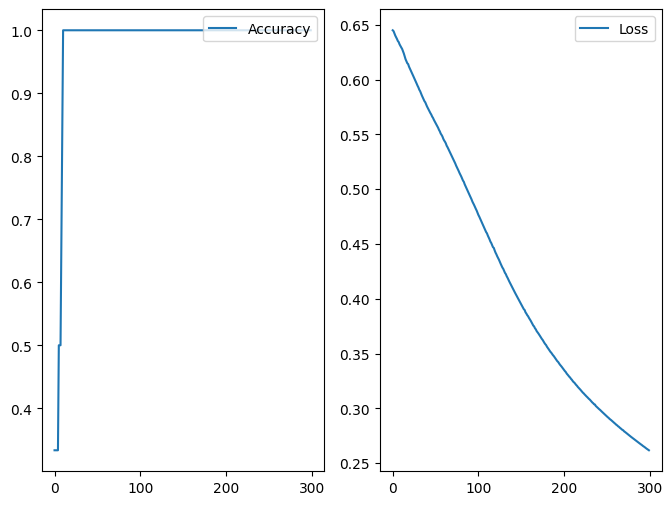

In [19]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
loss = history.history["loss"]

plt.figure(figsize = (8, 6))

# 1 row, 2 columns, 1st cell
plt.subplot(1, 2, 1)
plt.plot(accuracy, label = "Accuracy")
plt.legend(loc = "upper right")

# 1 row, 2 columns, 2nd cell
plt.subplot(1, 2, 2)
plt.plot(loss, label = "Loss")
plt.legend(loc = "upper right")